# Analysis of long time scale MD simulation of Ligand 47 with a-syn-C-term
Example code that computes the populations intermolecular interactions and dual residue contact probability between Ligand 47 and a-syn-C-term from a 200 microsecond MD simulation of Ligand 47 with a-syn-C-term. Plots included show both t-SNE cluster populations as well as weighted ensemble averages of all t-SNE clusters with cluster population weights from the original long time scale MD simulation. 

In [5]:
import numpy as np
import mdtraj as md
from docking_tools import trajectory_analysis 
from docking_tools import plotting

In [6]:
# loading in the long time scale MD simulation with Ligand 47 (all t-SNE clusters) 
traj_file = '/Users/anjalidhar/Desktop/docking/MD47_all.xtc'
pdb = '/Users/anjalidhar/Desktop/docking/MD47_all.pdb'
whole_traj = md.load(traj_file, top=pdb)

# loading in the cluster frame indices
clus_idx = np.insert(np.cumsum(np.loadtxt('/Users/anjalidhar/Desktop/docking/MD47_clus_idx.txt')), 0, 0)

# splitting the trajectory into our t-SNE clusters based on loaded indices
trajs = [whole_traj[int(clus_idx[i]):int(clus_idx[i+1])] for i in range(len(clus_idx)-1)]
n_frames = trajs[0].n_frames

# number of residues in the protein
n_res = trajs[0].atom_slice(trajs[0].top.select('protein')).n_residues

# residue index of our ligand 
# (assuming the ligand is the last residue and residues are 0 indexed)
ligand_idx = n_res

# number of clusters: 
n_clus = len(clus_idx)-1

# loading in population weights for t-SNE clusters for 
# long time scale MD simulation of a-syn-C-term with Ligand 47 
weights = np.load('/Users/anjalidhar/Desktop/docking/weights_47.npy')

In [7]:
contacts = {}

# computing intermolecular interaction probabilities for whole trajectory, then reshaping to account for all clusters 
contacts['hphob'] = trajectory_analysis.hphob_contacts(whole_traj, ligand_idx).reshape(n_clus, n_frames, n_res)
contacts['aro'] = trajectory_analysis.aro_contacts(whole_traj, ligand_rings=[[307, 308, 309, 311, 313 ,314]]).reshape(n_clus, n_frames, n_res)
contacts['hbond'] = trajectory_analysis.hbond(whole_traj, ligand_idx, lig_hbond_donors=[[329, 330], [329, 331]] ).reshape(n_clus, n_frames, n_res)
contacts['charge'] = trajectory_analysis.charge_contacts(whole_traj, Ligand_Pos_Charges=[329]).reshape(n_clus, n_frames, n_res)

# and then computing the ligand dual contact probability for each trajectory separately 
contacts['dual'] = np.array( [trajectory_analysis.dual_contact(t, residue_idx=ligand_idx) for t in trajs] )

## **Weighted Ensemble Average**
Plotting the weighted ensemble average of the populaton of intermolecular interactions and ligand dual residue contact probability for the long time scale MD simulation of a-syn-C-term with Ligand 47

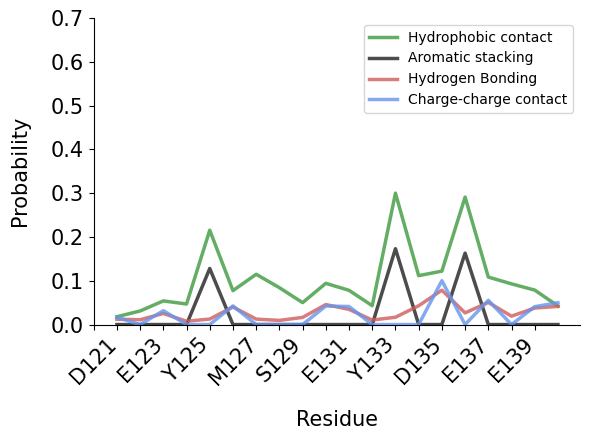

In [45]:
# intermolecular interactions
plotting.plot_ensemble_ii(contacts, weights)

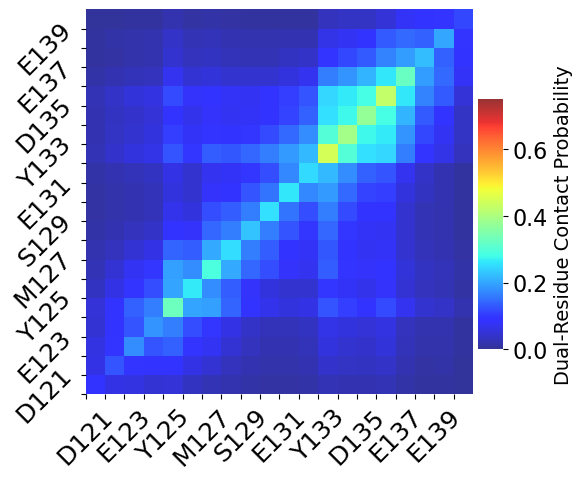

In [43]:
# ligand dual residue contact probability
plotting.plot_ensemble_dual(contacts['dual'], weights)

## **All t-SNE Clusters**
Plotting, for all t-SNE clusters, the populations of intermolecular interactions and ligand dual residue contact probability for the long time scale MD simulation of a-syn-C-term with Ligand 47

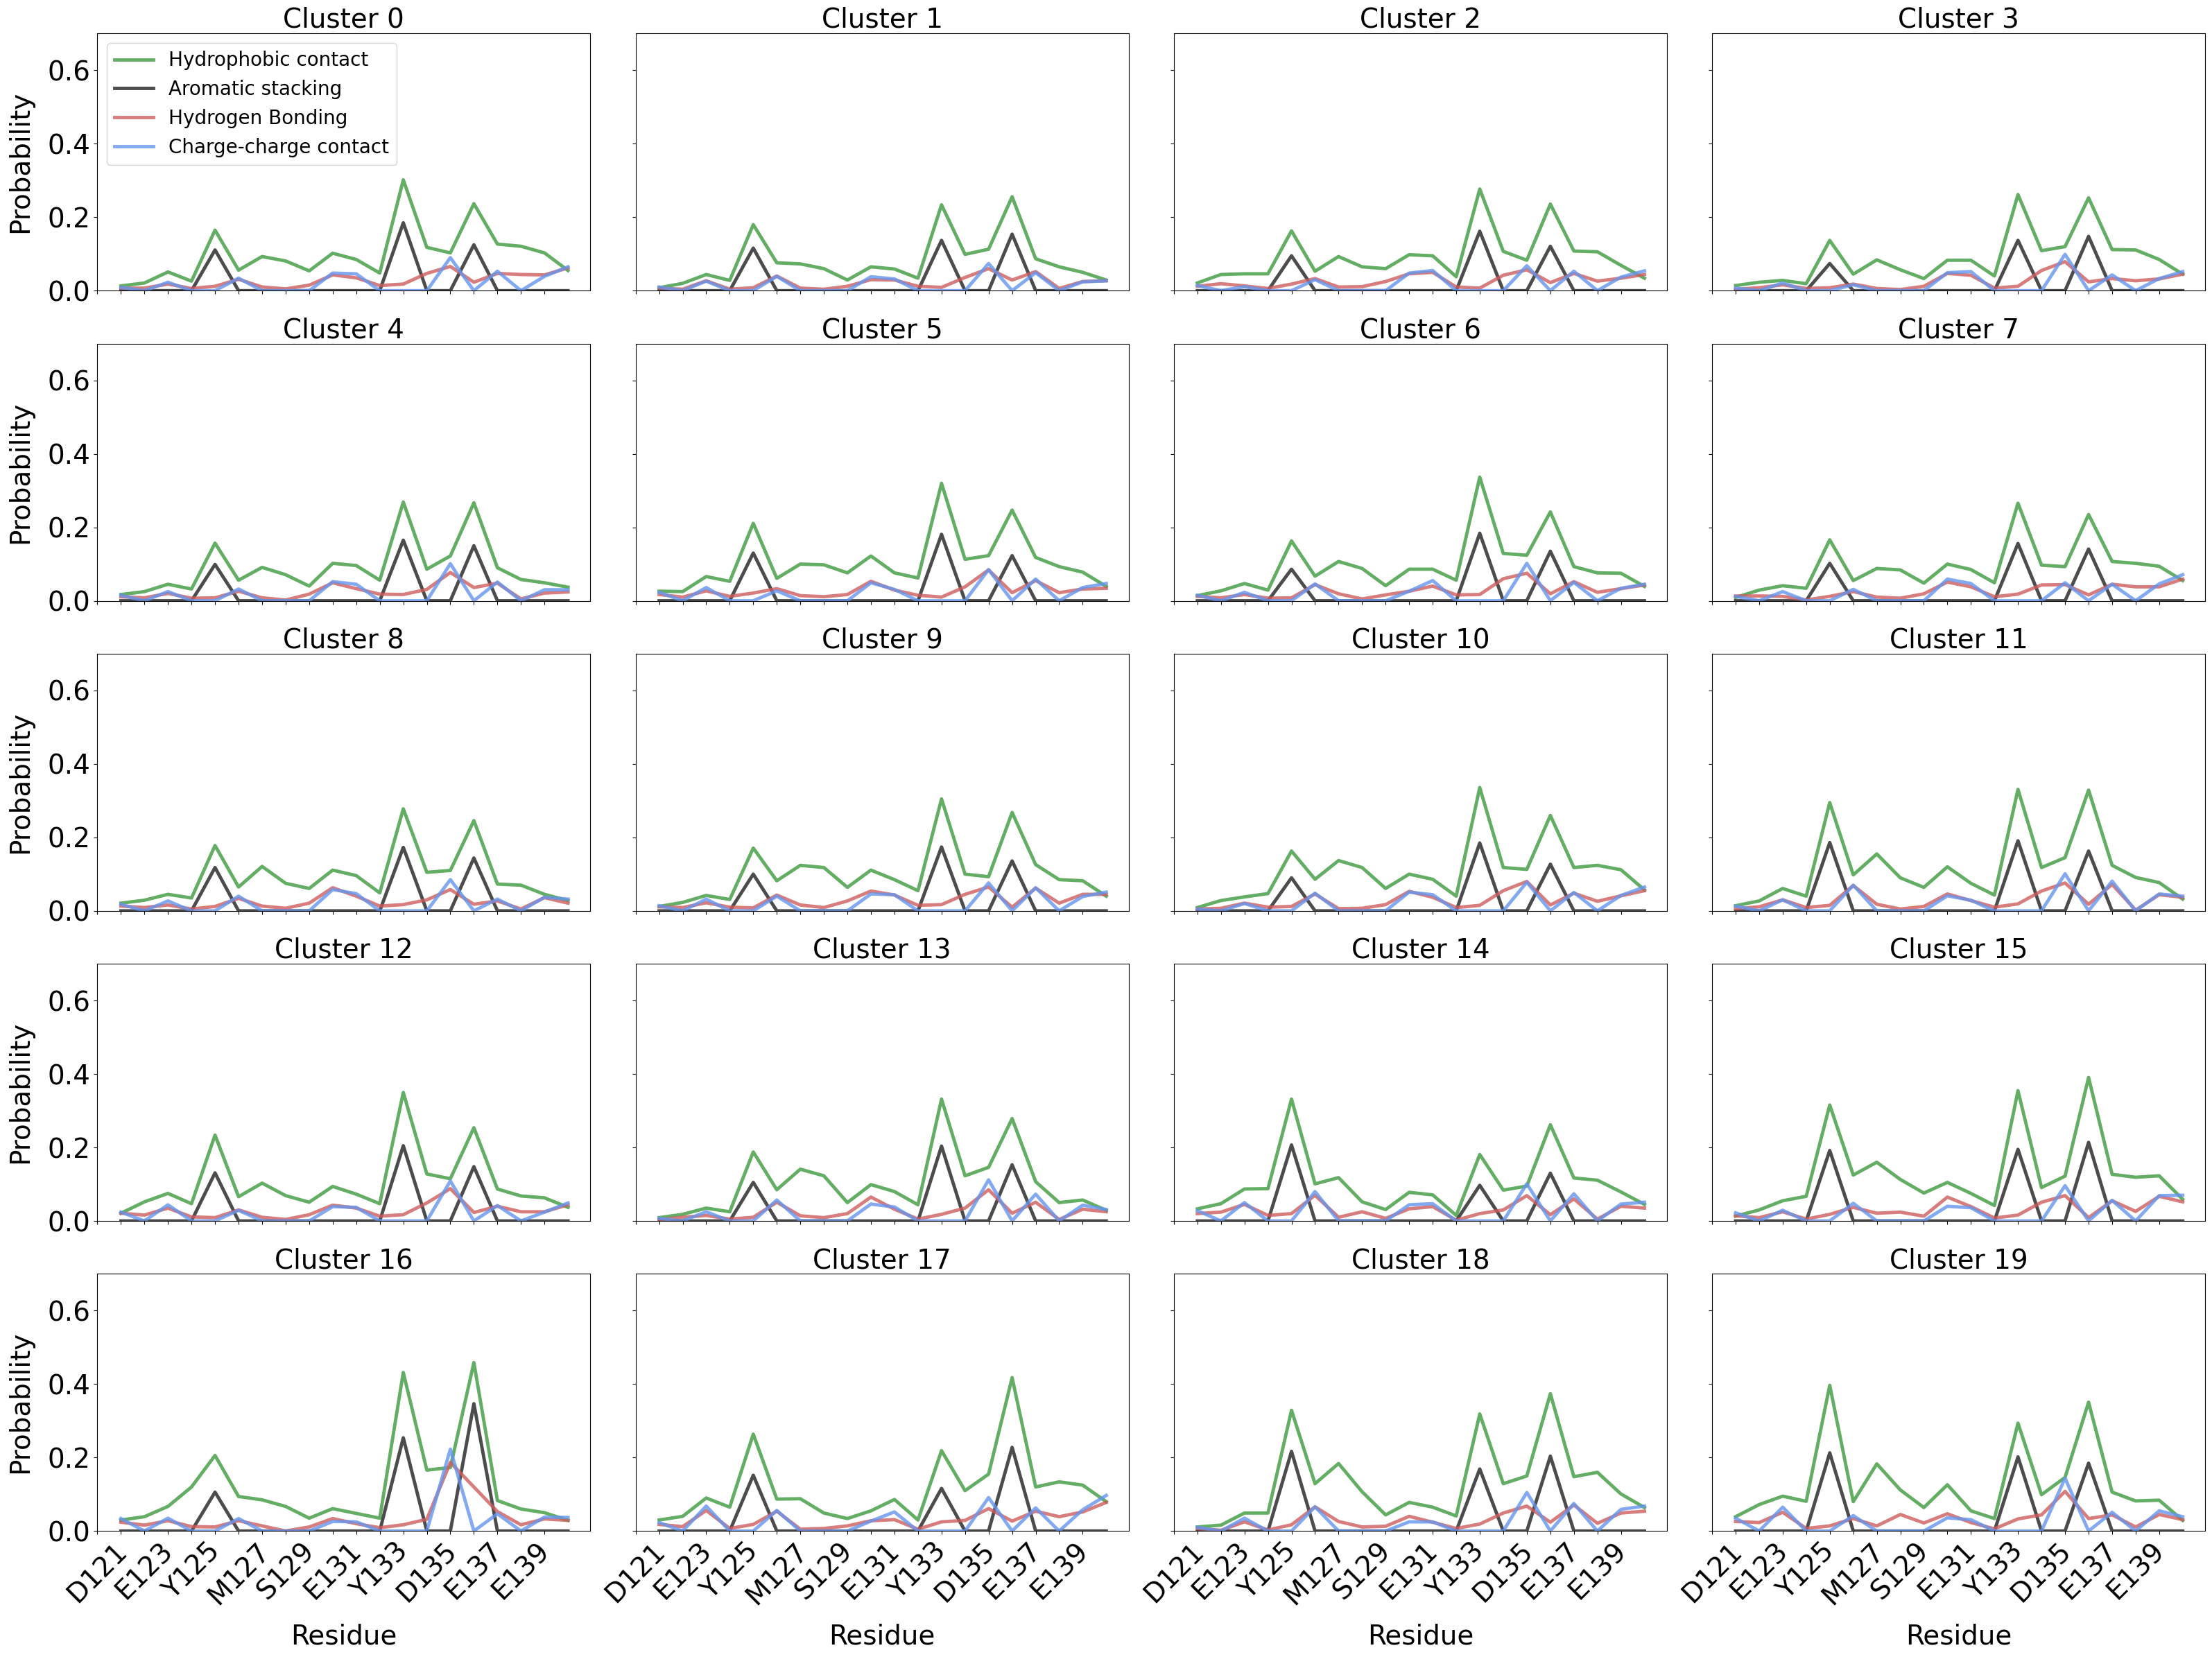

In [21]:
# intermolecular interactions
plotting.plot_clus_ii(contacts)

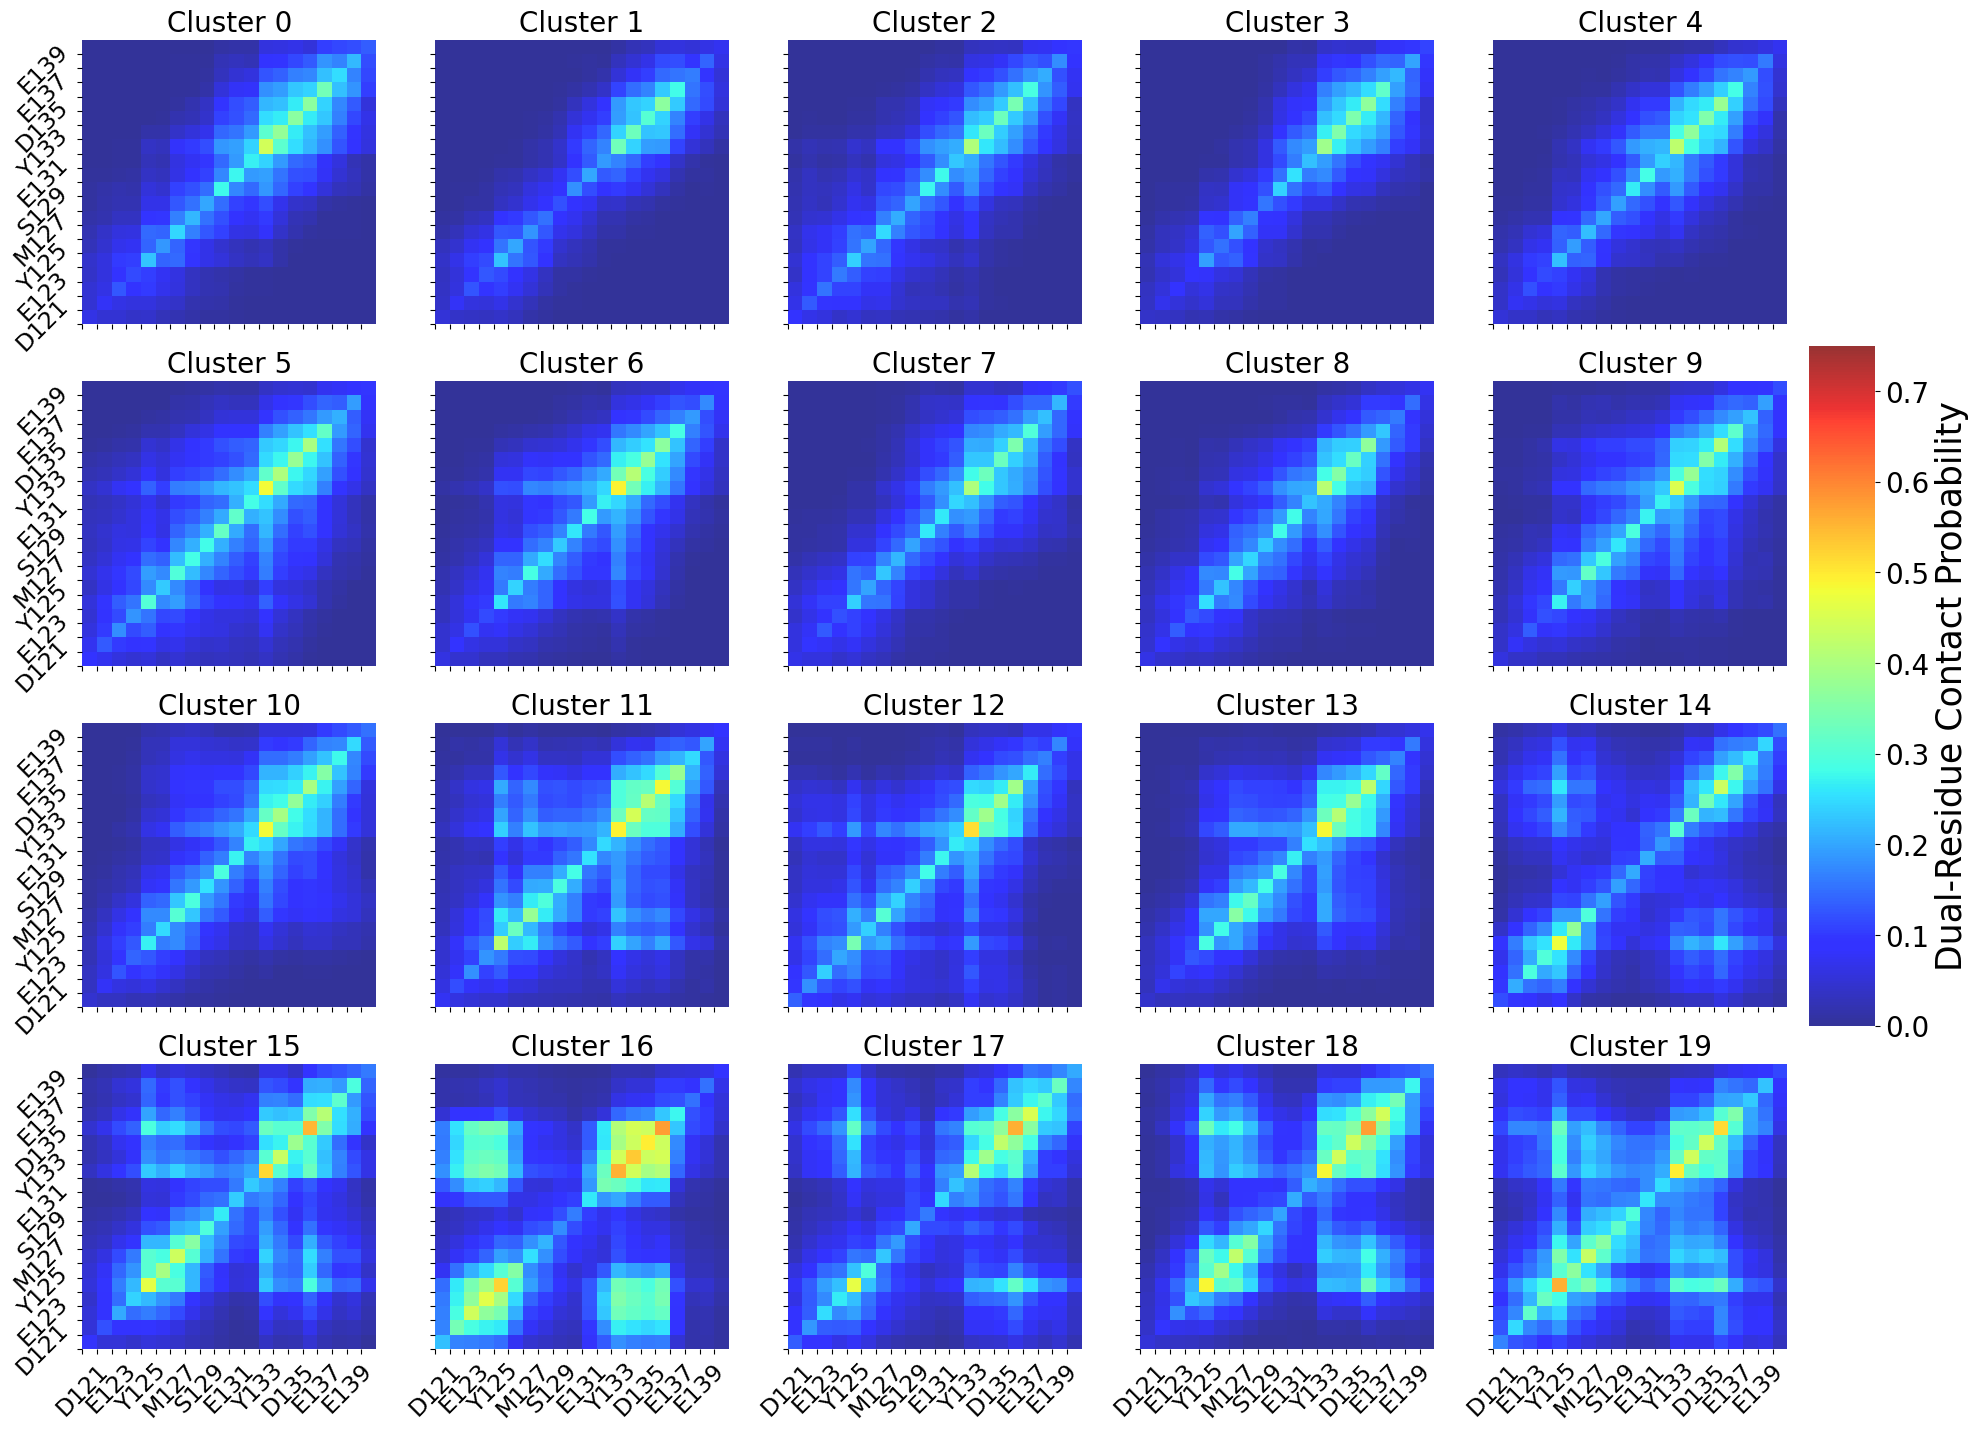

In [53]:
# ligand dual residue contact probability
plotting.plot_clus_dual(contacts['dual'])